In [3]:
import numpy as np              # llama la libreria "Numpy"
import pandas as pd             # llama la libreria "Pandas" como pd
import matplotlib.pyplot as plt # llama la libreria de matplotlib poara graficar
import scipy.stats as stats     # llama la libreria de funciones estadisticas

datos= pd.read_csv('datos.csv')   # Abre el archivo "datos.csv" y lo lee y almacena en el DataFrame "datos"
datos = datos.values              # "values" transforma el 'DataFrame' en un Array 'Numpy'



In [2]:
#Funcion Calculos
def calculos(array,i):
    amax=np.amax(array[:,i])      #Busca el mayor elemento
    print("La Maxima es:",amax)
    bmin=np.amin(array[:,i])      #Busca el minimo elemento
    print("La Minima es:",bmin)
    cmean=np.mean(array[:,i])
    print("La Media es:",cmean)   #Calcula la Media
    dstd=np.std(array[:,i])
    print("La Desviacion Estandar es:",dstd)      #Calcula la desviacion Estandar
    print("La Desviacion Estandar relativa es:",(np.var(array[:,i])/cmean),"%")   #Calcula Desviacion Estandar Relativa
    moda=stats.mode(array[:,i])            #Calcula la Moda
    print("esta es la moda :",float(moda[0]))

#-----------------------------------------------------------------------------------------------------------------

#Primer Grafico
    x= array[:,0]
    y= array[:,i]
    
    plt.scatter(x,y)                          #
    plt.xlabel("Tiempo en Dias")              ###
    if r == 1:                                  ###
        plt.ylabel("Temperatura")                ##
        plt.title("T1")                          ##
    if r == 2:                                   ##
        plt.ylabel("Temperatura")                ##
        plt.title("T2")                          ##
    if r == 3:                                   ##       Menu para escoger en que columna
        plt.ylabel("Presion")                    ##           realizar los Calculos
        plt.title("P1")                          ##            ya sea T1,T2,P1,P2,r,s
    if r == 4:                                   ##
        plt.ylabel("Presion")                    ##
        plt.title("P2")                          ##
    if r == 5:                                   ##
        plt.ylabel("Velocidad del Viento")       ##
        plt.title("R")                           ##
    if r == 6:                                  ###
        plt.ylabel("Precipitaciones")         ###
        plt.title("S")                        #
    plt.show()
    
#------------------------------------------------------------------------------------------------------------------    
   
#Primer Boxplot con Outliers
    plt.boxplot(array[:,i])
    plt.show()

#------------------------------------------------------------------------------------------------------------------
    print("En los siguientes graficos, se puede apreciar la diferencia de los que cuentan con Outliers de los que no  ")
#------------------------------------------------------------------------------------------------------------------   
#Calculos para identificar Outlaiers y reemplazarlos por la moda
    xr=(cmean+(3*dstd))
    array[:,i] = np.where(array[:,i] > xr, moda[0],array[:,i])
    xrn=(cmean-(3*dstd))
    array[:,i] = np.where(array[:,i] < xrn, moda[0],array[:,i])
#-----------------------------------------------------------------------------------------------------------------

#Segundo Grafico Sin Outliers
    x= array[:,0]
    y= array[:,i]

    plt.scatter(x,y)
    plt.xlabel("Tiempo en Dias")
    if r == 1:
        plt.ylabel("Temperatura")
        plt.title("T1")
    if r == 2:
        plt.ylabel("Temperatura")
        plt.title("T2")
    if r == 3:
        plt.ylabel("Presion")
        plt.title("P1")
    if r == 4:
        plt.ylabel("Presion")
        plt.title("P2")
    if r == 5:
        plt.ylabel("Velocidad del Viento")
        plt.title("R")
    if r == 6:
        plt.ylabel("Precipitaciones")
        plt.title("S")
    plt.show()
#------------------------------------------------------------------------------------------------------------
#Segundo Boxplot sin Outliers
    plt.boxplot(array[:,i])
    plt.show()
#-------------------------------------------------------------------------------------------------------------- 

ingrese opcion: 
 1)para T1 
 2)para T2 
 3)para P1 
 4)para P2 
 5)para r 
 6)para s 
1
La Maxima es: 80.0
La Minima es: 6.0
La Media es: 22.61707988980716
La Desviacion Estandar es: 7.097272611736008
La Desviacion Estandar relativa es: 2.227134482909037 %
esta es la moda : 23.0


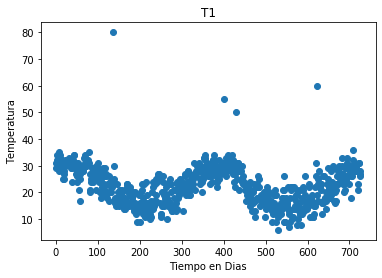

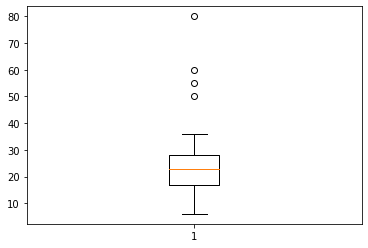

En los siguientes graficos, se puede apreciar la diferencia de los que cuentan con Outliers de los que no  


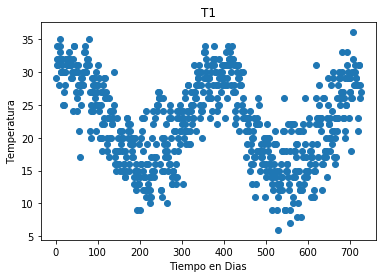

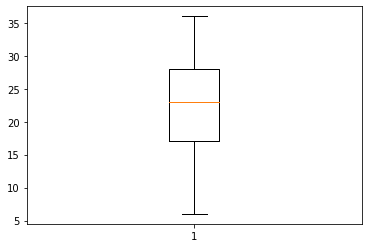

In [3]:
#Ejecuta la funcion 'calculos'
r = int(input('ingrese opcion: \n 1)para T1 \n 2)para T2 \n 3)para P1 \n 4)para P2 \n 5)para r \n 6)para s \n'))
calculos(datos,r)

In [4]:
#Creacion de las columna 'rs' y la sumatoria de 'rs' en rsacum 
print(datos.shape)
rs=np.multiply(datos[:,5],datos[:,6])   #Multiplica la columna 'r' con la columna 's' y la almacena en 'rs'
rsacum = np.cumsum(rs)                  #Guarda la suma acumulada de la columna rs
datos = np.column_stack((datos,rs))     #Agrega la columna 'rs' a la matriz 'datos'
print(datos.shape)

#Creacion de columna TT con los porcentajes de T2 es de T1 
TT = np.round((np.divide(datos[:,2],datos[:,1]))*100)  #obtiene el porcentaje, lo redondea y guarda en 'TT'
datos = np.column_stack((datos,TT))                    #Agrega la columna 'TT' a 'datos'
print(datos.shape)

(726, 7)
(726, 8)
(726, 9)


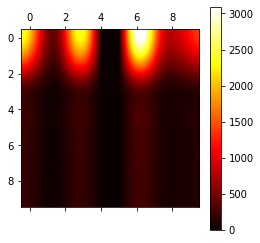

[[2010.    536.   1206.   2278.      0.    134.   3095.4  1742.    804.
  1206.  ]
 [1500.    400.    900.   1700.      0.    100.   2310.   1300.    600.
   900.  ]
 [ 745.5   198.8   447.3   844.9     0.     49.7  1148.07  646.1   298.2
   447.3 ]
 [ 222.     59.2   133.2   251.6     0.     14.8   341.88  192.4    88.8
   133.2 ]
 [ 186.     49.6   111.6   210.8     0.     12.4   286.44  161.2    74.4
   111.6 ]
 [ 181.5    48.4   108.9   205.7     0.     12.1   279.51  157.3    72.6
   108.9 ]
 [ 174.     46.4   104.4   197.2     0.     11.6   267.96  150.8    69.6
   104.4 ]
 [ 169.5    45.2   101.7   192.1     0.     11.3   261.03  146.9    67.8
   101.7 ]
 [ 166.5    44.4    99.9   188.7     0.     11.1   256.41  144.3    66.6
    99.9 ]
 [ 165.     44.     99.    187.      0.     11.    254.1   143.     66.
    99.  ]]


In [5]:
#Ordenar los datos de r de Mayor a menor y almacenar los 10 primeros en en 'array' y graficar usando un 'Heatmap'

copydatos=datos[:,5:7]         #crea una copia de la columna 'r' y 's' y la almacena en 'copydatos'
heatdatos=np.ones([10,10])     #crea una matriz de 10x10 solo de unos

newdatos=copydatos[copydatos[:,0].argsort()[::-1][:10]] #ordena la columna 'r' de mayor a menor y toma el indice de los 10 mayores datos 
r1=newdatos[:,0]             #variable que almacena la columna 'r' de newdatos
r2=newdatos[:,1]             #variable que almacena la columna 's' de newdatos

for i in range(len(newdatos[:,0])):      #i recorre cada elemento de la longitud de newdatos columna 'r' y toma su valor 
    for j in range(len(newdatos[:,1])):  #j recorre cada elemento de la longitud de newdatos columna 's' y toma su valor 
        heatdatos[i,j]=r1[i]*r2[j]       #se almacena en una nueva matriz (heatdatos) la multiplicacion de los indices de r1 y r2

plt.matshow(heatdatos, cmap='hot', interpolation='lanczos') #muestra un grafico de Mapa de calor
plt.colorbar()
plt.show()  

print(heatdatos)

(726, 10)


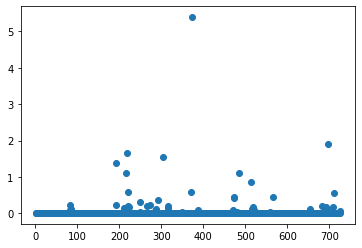

(726, 11)
La Maxima es: 222.12178364813263
La Minima es: 1.0
La Media es: 1.348269170687786
La Desviacion Estandar es: 8.206603798630931


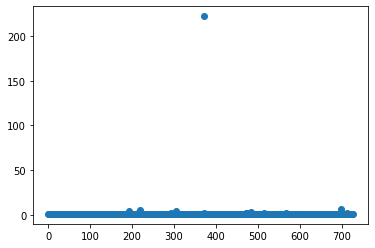

/home/c2-8/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log
/home/c2-8/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


(726, 12)
La Maxima es: 1.686996146779975
La Minima es: -inf
La Media es: -inf
La Desviacion Estandar es: nan


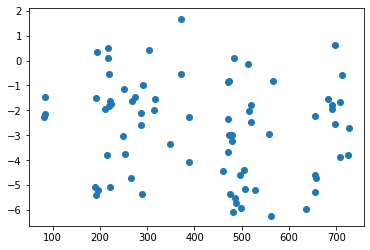

In [6]:
#Calculos de funciones
f_lineal=np.divide(datos[:,7],datos[:,0])  #f_lineal almacena la division de T2 en T1
datos = np.column_stack((datos,f_lineal))  #agrega la columna 'f_lineal' a 'datos'
print(datos.shape)

x= datos[:,0]
y= datos[:,9]
                         #muestra grafico
plt.scatter(x,y)
plt.show()
#------------------------------------------------------------------------------------------------------------------
R=np.exp(f_lineal)                 #obtiene el exponencial de los datos almacenados en 'f_lineal' y guarda en R
datos = np.column_stack((datos,R)) #agrega una nueva columna 'R' a 'datos'
print(datos.shape)


mx=np.amax(R)                      #
print("La Maxima es:",mx)           #
mn=np.amin(R)                       #
print("La Minima es:",mn)            #        Obtencion de maximo, minimo, media y desviacion standar de 'R' 
med=np.mean(R)                         #
print("La Media es:",med)              #
dst=np.std(R)                            #
print("La Desviacion Estandar es:",dst)   # 

x1= datos[:,0]
y1= datos[:,10]

plt.scatter(x1,y1)
plt.show()
#------------------------------------------------------------------------------------------------------------------
W=np.log(f_lineal)                  #obtiene el logaritmo de los datos almacenados en 'f_lineal' y guarda en W
datos = np.column_stack((datos,W))
print(datos.shape)

mx=np.amax(W)                      #
print("La Maxima es:",mx)           #
mn=np.amin(W)                       #
print("La Minima es:",mn)            #        Obtencion de maximo, minimo, media y desviacion standar de 'W' 
med=np.mean(W)                         #
print("La Media es:",med)              #
dst=np.std(W)                            #
print("La Desviacion Estandar es:",dst)   # 

x2= datos[:,0]
y2= datos[:,11]

plt.scatter(x2,y2)
plt.show()
    


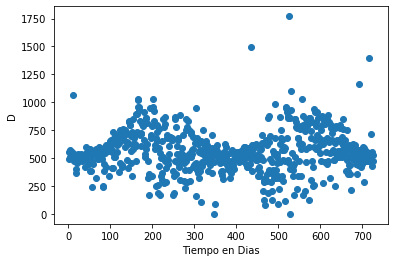

In [5]:
#Calculo entre 2 puntos  
Tx=np.subtract(datos[:,1],datos[:,2])    #resta T1 y T2 y el resultado lo almacena en Tx
Tx2=np.subtract(datos[:,3],datos[:,4])   #resta P1 y P2 y el resultado lo almecena en Tx2
D=np.sqrt(((Tx)**2)+((Tx2)**2) )                 #calcula la Raiz cuadrada de (Tx+Tx2)^2 y la almecena en D

x= datos[:,0]
y= D

plt.scatter(x,y)
plt.xlabel("Tiempo en Dias")
plt.ylabel("D")
plt.show() 


In [8]:
print(len(R))
NR=R[np.all([R>1,R<2],axis=0)]    #Toma de muestra solo los datos que sean mayores a 1 y menores a 2 de 'R' y la almacena en 'RN'
print(NR)

726
[1.11030433 1.25572217 1.12307609 1.00617689 1.00456536 1.24958625
 1.00555383 1.15327605 1.02268335 1.17608577 1.77704975 1.21969068
 1.00637156 1.18954565 1.04920436 1.37470615 1.02421716 1.00906338
 1.21537926 1.25639709 1.07958146 1.12698625 1.00466362 1.45788434
 1.14670073 1.23379482 1.03527851 1.79966597 1.10950895 1.0168499
 1.01211181 1.02586065 1.10053473 1.51732536 1.55948428 1.05149291
 1.00468462 1.05155645 1.04020381 1.00231036 1.00395843 1.00329082
 1.01019244 1.00265412 1.01229722 1.00582719 1.1386736  1.18477969
 1.0898692  1.00561115 1.0537798  1.00198057 1.55852362 1.00254641
 1.11624393 1.01018896 1.00504316 1.0088978  1.23996174 1.15428172
 1.18540763 1.08043517 1.20573627 1.02077707 1.75382261 1.02259634
 1.06941037]


In [9]:
print(len(NR))

67
